In [1]:
#import Libraries
using Zygote
using LinearAlgebra
using Plots

In [2]:
#basic model of Linear
mutable struct Linear
    W
    b
end

(l::Linear)(x) = l.W * x .+ l.b

(l::Linear)(x,y) = norm(l.W * x .+ l.b .- y, 2)

In [3]:
#generate fake data points
weights_gt = [1.2, 4.8]'
bias_gt = 2.4
X = randn(length(weights_gt), 1000)
Y = weights_gt * X .+ bias_gt
X .+= 10.0.*randn(size(X))

2×1000 Array{Float64,2}:
 -19.676     6.99416   -7.78424  -5.59309  …  11.4695    7.4226   -0.688778
  -2.38668  -2.58137  -10.1585   14.45        -1.18507  -4.15796  12.2785  

In [4]:
model = Linear(rand(1,2), rand(1))

Linear([0.54962 0.065161], [0.293764])

In [5]:
function sgd_update!(model::Linear, dmodel, η = 0.005)
    model.W .-= η .* dmodel.W
    model.b -= η * dmodel.b
end

sgd_update! (generic function with 2 methods)

In [6]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [7]:
losses_10 = []
W_log = []
b_log = []
for idx in 1:10000
    i = (idx%100)*10
    losses_10 = append!(losses_10,[model(X,Y)])
    grads = gradient(model -> model(X[:,1+i:10+i],Y[:,1+i:10+i])/sqrt(10),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b)
    sgd_update!(model, grads)
end

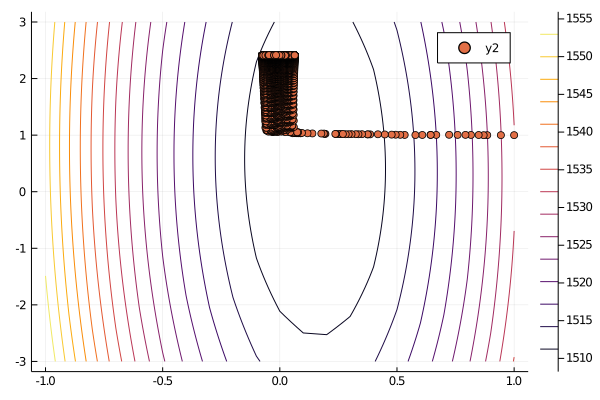

In [8]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [9]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [10]:
losses_100 = []
W_log = []
b_log = []
for idx in 1:10000
    i  = (idx%10)*100
    losses_100 = append!(losses_100,[model(X,Y)])
    grads = gradient(model -> model(X[:,1+i:100+i],Y[:,1+i:100+i])/10,model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b[1])
    sgd_update!(model, grads)
end

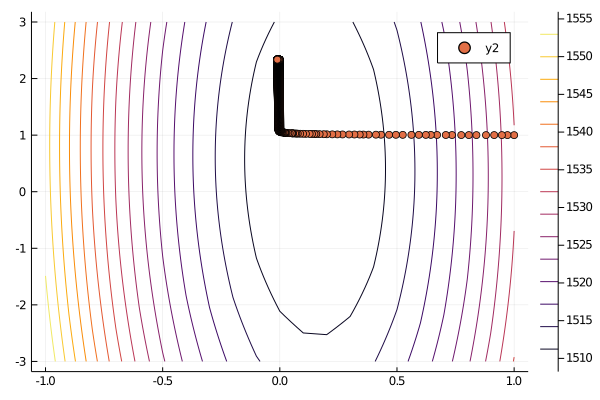

In [11]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [12]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [13]:
losses_1000 = []
W_log = []
b_log = []
for idx in 1:10000
    i = (idx%1)*1000
    losses_1000 = append!(losses_1000,[model(X,Y)])
    grads = gradient(model -> model(X[:,:],Y[:,:])/sqrt(1000),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b[1])
    sgd_update!(model, grads)
end

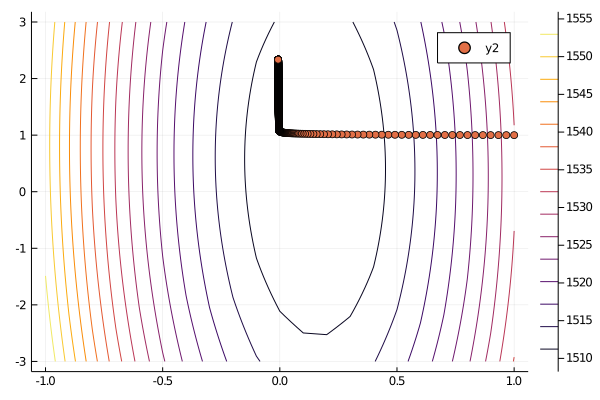

In [14]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [15]:
model.W = [1.0 1.0]
model.b = [1.0]

1-element Array{Float64,1}:
 1.0

In [16]:
losses_stochastic = []
W_log = []
b_log = []
for idx in 1:100
    i = rand(1:size(X,2))
    losses_stochastic = append!(losses_stochastic,[model(X,Y)])
    grads = gradient(model -> model(X[:,i],Y[:,i]),model)[1][]
    W_log = append!(W_log,model.W[1])
    b_log = append!(b_log,model.b[1])
    sgd_update!(model, grads)
end

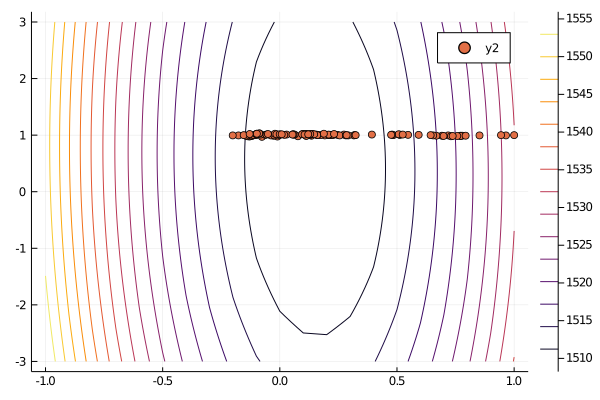

In [17]:
x =-1:0.1:1
y =-3:0.1:3
f(w1,b1) = begin

    model.W = [w1,4.8]
    model.W = reshape(model.W, 1, :)
    model.b = [b1]
    model(X,Y)

    end
X1 = repeat(reshape(x, 1, :), length(y), 1)
Y1 = repeat(y, 1, length(x))
Z = map(f, X1, Y1)
p2 = contour(x, y, Z)
p1 = scatter!(W_log,b_log)
plot(p2)

In [18]:
@info("Ground truth weights: $(weights_gt)")
@info("Learned weights: $(round.(model.W; digits=3))")
@info("Ground truth bias: $(bias_gt)")
@info("Learned bias: $(round.(model.b; digits=3))")

┌ Info: Ground truth weights: [1.2 4.8]
└ @ Main In[18]:1
┌ Info: Learned weights: [1.0 4.8]
└ @ Main In[18]:2
┌ Info: Ground truth bias: 2.4
└ @ Main In[18]:3
┌ Info: Learned bias: [3.0]
└ @ Main In[18]:4


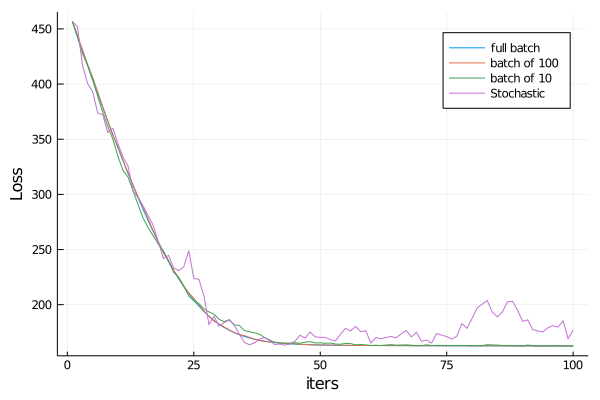

In [19]:
plot([losses_1000[1:100],losses_100[1:100],losses_10[1:100],losses_stochastic[1:100]],xlabel = "iters",ylabel="Loss",label = ["full batch" "batch of 100" "batch of 10" "Stochastic"])

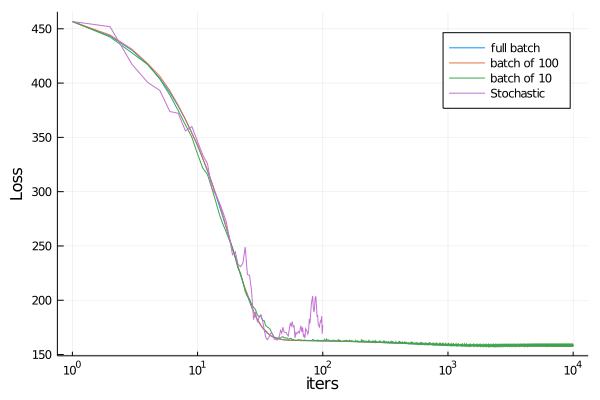

In [20]:
plot([losses_1000,losses_100,losses_10,losses_stochastic],xaxis=:log10,xlabel = "iters",ylabel="Loss",label = ["full batch" "batch of 100" "batch of 10" "Stochastic"])

In [469]:
xticks = ([0,10,100,1000,10000,10000])

6-element Array{Int64,1}:
     0
    10
   100
  1000
 10000
 10000

In [472]:
10^[1:10]

MethodError: [91mMethodError: no method matching ^(::Int64, ::Array{UnitRange{Int64},1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  ^(::Integer, [91m::Bool[39m) at bool.jl:108[39m
[91m[0m  ^(::T<:Real, [91m::Complex{T<:Real}[39m) where T<:Real at complex.jl:738[39m
[91m[0m  ^(::T<:Real, [91m::Complex{S<:Real}[39m) where {T<:Real, S<:Real} at complex.jl:755[39m
[91m[0m  ...[39m